<a href="https://colab.research.google.com/github/romanzes637/tensor/blob/master/clust.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# optional
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import time
import os
import numpy as np
import pickle

In [4]:
t0 = time.time()
name = 'test5'
gdir = '/gdrive/My Drive/Colab Notebooks'
update = False
if update:
  s0 = 1  # step
  s1 = 35
  paths = ['/gdrive/My Drive/Colab Notebooks/tube10El/{}/devStr'.format(x) 
  for x in range(s0, s1)]
  times = list()
  ts = list()
  c0 = 0  # cell
  c1 = 69030
  for i, p in enumerate(paths):
    print('{}/{} {}'. format(i + 1, len(paths), p))
    with open(p) as f:
      lines = f.readlines()
      t = np.array([[float(y) for y in x.strip()[1:-1].split()] 
                    for x in lines[18:-5]])[c0:c1]
      ts.append(t)
      times.append(np.full(len(t), i + 1))
  ts = np.vstack(ts)
  times = np.hstack(times)
  np.save(os.path.join(gdir, 'ts_{}'.format(name)), ts)
  np.save(os.path.join(gdir, 'times_{}'.format(name)), times)
else:
  ts = np.load(os.path.join(gdir, 'ts_{}.npy'.format(name)))
  times = np.load(os.path.join(gdir, 'times_{}.npy'.format(name)))
print('{:.3f}s'.format(time.time() - t0))
print(len(ts), ts[0], ts[-1])
print(len(times), times[0], times[-1])

3.631s
544000 [-1.11442e+06  5.29497e+06 -1.79275e-01 -5.22253e+05 -1.45083e+00
  1.63667e+06] [-1.40360e+07  3.08915e+07  3.49738e-01 -2.03111e+07 -2.18567e-01
  3.43470e+07]
544000 1 34


In [0]:
def tensor_sort(t, voight=False):
  if not voight:  # Voight XX XY XZ YY YZ ZZ
    st_map = {0: 0, 1: 3, 2: 5}
    at_map = {
        (1, 2): 4, (2, 1): 4,
        (0, 2): 2, (2, 0): 2,
        (0, 1): 1, (1, 0): 1
    }
    st = np.array([t[0], t[3], t[5]])  # XX YY ZZ
  else:  # Voight XX YY ZZ YZ XZ XY
    st_map = {0: 0, 1: 2, 2: 2} 
    at_map = {
        (1, 2): 3, (2, 1): 3,
        (0, 2): 4, (2, 0): 4,
        (0, 1): 5, (1, 0): 5
    }
    st = t[:3]   # XX YY ZZ
  sort_st = np.argsort(-np.abs(st))
  ind = np.array([st_map[sort_st[0]], 
                  st_map[sort_st[1]], 
                  st_map[sort_st[2]], 
                  at_map[(sort_st[0], sort_st[1])],
                  at_map[(sort_st[1], sort_st[2])],
                  at_map[(sort_st[2], sort_st[0])]])
  new_t = t[ind]
  return new_t

def tensors_stat(ts):
  stat = dict()
  for t in ts:
    tt = tuple(t)
    stat[tt] = stat.get(tt, 0) + 1
  return stat
   
def tensors_groups(ts, ndigits=2):
  groups = dict()
  for i, t in enumerate(ts): 
    tt = tuple(round(x, ndigits) for x in t)
    groups.setdefault(tt, list()).append(i)
  map_tensor_group = dict()
  for gi, (k, v) in enumerate(groups.items()):
    for ti in v:
      map_tensor_group[ti] = gi
  return groups, map_tensor_group

def tensors_principals(ts):
  # return [[max, int, min], ...]
  ps = np.apply_along_axis(lambda x: np.sort(np.linalg.eigvalsh(np.array(
      [[x[0], x[1], x[2]], 
       [x[1], x[3], x[4]], 
       [x[2], x[4], x[5]]])))[::-1], 1, ts)
  return ps

# tensors_principals(ts)
# t = np.array([1, 6, -3, 5, 0, -4])
# tensor_sort(t)
# ts = np.array([
#     [1, 2, -3, 2, 0, 1],
#     [1, 2, -3, 2, 0, 1]
# ])
# print(ts)
# ts = np.apply_along_axis(tensor_sort, 1, ts)
# print(ts)
# ts = np.apply_along_axis(
#     lambda x: x / max(np.abs(x)) if max(np.abs(x)) != 0 else x, 1, ts)
# print(ts)
# tensors_group(ts, 2)

In [64]:
update = False
t0 = time.time()
if update:
  print(len(ts))
  print(ts[0])
  X = ts.copy()
  max_abs = np.amax(np.abs(X), axis=1)
  print(max_abs[0])
  sum_abs = np.sum(np.abs(X), axis=1)
  print(sum_abs[0])
  # Threshold
  threshold = 1e6
  # X = X[max_abs > threshold]
  # x_max_abs = max_abs[max_abs > threshold]
  # x_sum_abs = sum_abs[max_abs > threshold]
  X = X[sum_abs > threshold]
  x_max_abs = max_abs[sum_abs > threshold]
  x_sum_abs = sum_abs[sum_abs > threshold]
  times = times[sum_abs > threshold]
  print(len(X))
  print(X[0])
  # Sort tensors (max, int, min, max-int, int-min, min-max)
  X = np.apply_along_axis(tensor_sort, 1, X)
  print(X[0])
  # Normalize to interval [-1, 1]
  X = np.apply_along_axis(
      lambda x: x / max(np.abs(x)) if max(np.abs(x)) != 0 else x, 1, X)
  print(X[0])
  # Normalize to distinct: -1, 0 and 1, 0.5, -0.5
  # X2 = X.copy()
  # print(X[-1])
  # print(X2[-1])
  # X2[(X2 > -1e-3) & (X2 < 1e-3)] = 0
  # # X2[(X2 > 0) & (X2 <= 0.5)] = 0.5
  # # X2[(X2 < 0) & (X2 >= -0.5)] = -0.5
  # # X2[(X2 > 0.5)] = 1
  # # X2[(X2 < -0.5)] = -1
  # X2[X2 > 0] = 1
  # X2[X2 < 0] = -1
  # print(X[-1])
  # print(X2[-1])
  # Groups of identical tensors
  gs, map_tg = tensors_groups(X, 2)
  gs_ps = tensors_principals(np.array(list(gs)))
  gs_mean_normal = 0.5*(gs_ps[:, 0] + gs_ps[:, 2])
  gs_max_shear = 0.5*(gs_ps[:, 0] - gs_ps[:, 2])
  gs_times = [[times[x] for x in y] for y in gs.values()]
  gs_abs = [[x_max_abs[x] for x in y] for y in gs.values()]
  gs_sum = [[x_sum_abs[x] for x in y] for y in gs.values()]
  gs_max_abs = np.array([max(x) for x in gs_abs])
  gs_max_abs_times = [{gs_times[i][x[0]] for x in np.argwhere(y==gs_max_abs[i])} 
                      for i, y in enumerate(gs_abs)]
  gs_sum_abs = np.array([max(x) for x in gs_sum])
  gs_sum_abs_times = [{gs_times[i][x[0]] for x in np.argwhere(y==gs_sum_abs[i])} 
                      for i, y in enumerate(gs_sum)]
  # MC
  phi = np.pi / 6 
  c = 100e6
  # mc = gs_max_abs*gs_mean_normal*np.sin(phi) + np.full_like(abs_mean_normal, c)*np.cos(phi)
  mc = gs_max_abs*gs_mean_normal*np.sin(phi) + c*np.cos(phi)
  # gs_mean_max_abs = np.array([np.mean([x_max_abs[x] for x in y]) for y in gs.values()])
  # gs_mean_sum_abs = np.array([np.mean([x_sum_abs[x] for x in y]) for y in gs.values()])
  # gs_std_max_abs = np.array([np.std([x_max_abs[x] for x in y]) for y in gs.values()])
  # gs_std_sum_abs = np.array([np.std([x_sum_abs[x] for x in y]) for y in gs.values()])
  print(len(gs))
  print(len(mc))
  print(gs_times[0])
  print(gs_ps[0])
  print(gs_max_abs[0])
  print(gs_max_abs_times[0])
  print(gs_sum_abs[0])
  print(gs_sum_abs_times[0])
  print(mc[0])
  # print(gs_mean_max_abs[0])
  # print(gs_mean_sum_abs[0])
  # print(gs_std_max_abs[0])
  # print(gs_std_sum_abs[0])
  X = np.array(list(gs))
  # # print(X3)
  # # Evaluate distinct categories
  # X3D = X3.copy()
  # X3D[(X3D > -1e-3) & (X3D < 1e-3)] = 0
  # # X3D[(X3D > 0) & (X3D <= 0.5)] = 0.5
  # # X3D[(X3D < 0) & (X3D >= -0.5)] = -0.5
  # # X3D[(X3D > 0.5)] = 1
  # # X3D[(X3D < -0.5)] = -1
  # X3D[X3D > 0] = 1
  # X3D[X3D < 0] = -1
  # print(X3D[0])
  # x3d_gs, x3d_tg = tensors_groups(X3D)
  np.save(os.path.join(gdir, 'X_{}'.format(name)), X)
  np.save(os.path.join(gdir, 'gs_ps_{}'.format(name)), gs_ps)
  np.save(os.path.join(gdir, 'gs_max_abs_{}'.format(name)), gs_max_abs)
  np.save(os.path.join(gdir, 'gs_sum_abs_{}'.format(name)), gs_sum_abs)
  np.save(os.path.join(gdir, 'mc_{}'.format(name)), mc)
  np.save(os.path.join(gdir, 'gs_mean_normal_{}'.format(name)), gs_mean_normal)
  np.save(os.path.join(gdir, 'gs_max_shear_{}'.format(name)), gs_max_shear)
  with open(os.path.join(gdir, 
                         'gs_max_abs_times_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(gs_max_abs_times, f, protocol=pickle.HIGHEST_PROTOCOL)
  with open(os.path.join(gdir, 
                         'gs_sum_abs_times_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(gs_max_abs_times, f, protocol=pickle.HIGHEST_PROTOCOL)
  with open(os.path.join(gdir, 'groups_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(gs, f, protocol=pickle.HIGHEST_PROTOCOL)
  with open(os.path.join(gdir, 'map_tg_{}.pickle'.format(name)), 'wb') as f:
    pickle.dump(map_tg, f, protocol=pickle.HIGHEST_PROTOCOL)
else:
  X = np.load(os.path.join(gdir, 'X_{}.npy'.format(name)))
  gs_ps = np.load(os.path.join(gdir, 'gs_ps_{}.npy'.format(name)))
  gs_max_abs = np.load(os.path.join(gdir, 'gs_max_abs_{}.npy'.format(name)))
  gs_sum_abs = np.load(os.path.join(gdir, 'gs_sum_abs_{}.npy'.format(name)))
  mc = np.load(os.path.join(gdir, 'mc_{}.npy'.format(name)))
  gs_mean_normal = np.load(os.path.join(gdir, 
                                        'gs_mean_normal_{}.npy'.format(name)))
  gs_max_shear = np.load(os.path.join(gdir, 'gs_max_shear_{}.npy'.format(name)))
  with open(os.path.join(gdir, 
                         'gs_max_abs_times_{}.pickle'.format(name)), 'rb') as f:
    gs_max_abs_times = pickle.load(f)
  with open(os.path.join(gdir, 
                         'gs_sum_abs_times_{}.pickle'.format(name)), 'rb') as f:
    gs_sum_abs_times = pickle.load(f)
  with open(os.path.join(gdir, 'groups_{}.pickle'.format(name)), 'rb') as f:
    gs = pickle.load(f)
  with open(os.path.join(gdir, 'map_tg_{}.pickle'.format(name)), 'rb') as f:
    map_tg = pickle.load(f)
print('{:.3f}s'.format(time.time() - t0))

0.225s


standard: 0.049 sec
ltsa: 0.081 sec
hessian: 0.16 sec
modified: 0.13 sec
Isomap: 0.045 sec
MDS: 0.35 sec
SpectralEmbedding: 0.058 sec


/usr/local/lib/python3.6/dist-packages/sklearn/manifold/spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


t-SNE: 1.7 sec


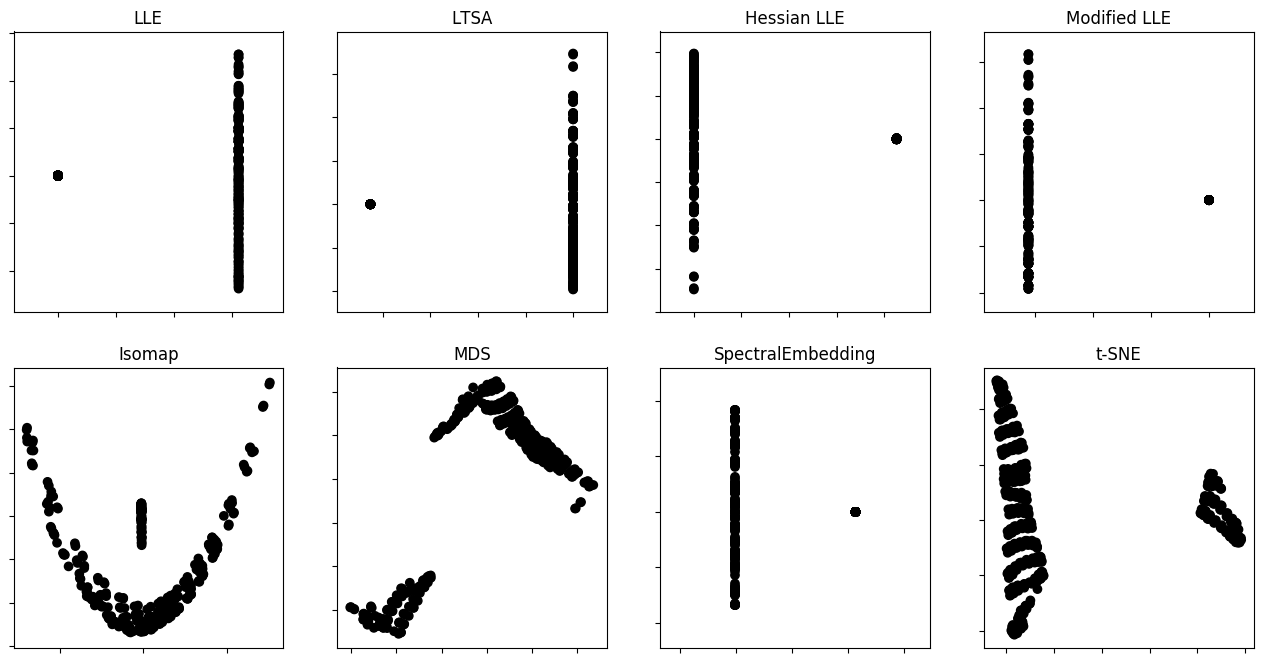

In [57]:
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets, preprocessing

style.use('default')
# Next line to silence pyflakes. This import is needed.
Axes3D  

# Fixing random seed
np.random.seed(0)

fig = plt.figure(figsize=(16, 8))
n_points = len(X)
n_neighbors = 10
n_components = 2
# plt.suptitle("Manifold Learning with %i points, %i neighbors"
#              % (n_points, n_neighbors), fontsize=14)
# color = np.array([x3d_tg[i] for i, _ in enumerate(X3)])
color = np.ones(len(X))  # black


# ax = fig.add_subplot(251, projection='3d')
# ax.scatter(X3[:, 0], X3[:, 1], X3[:, 2], c=color, cmap=plt.cm.Spectral)
# ax.view_init(4, -72)

methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

YS = list()
for i, method in enumerate(methods):
    t0 = time.time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X)
    t1 = time.time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(241 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.gray)
#     plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    plt.title("%s" % (labels[i]))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    YS.append(Y)

t0 = time.time()
Y_iso = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time.time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(245)
plt.scatter(Y_iso[:, 0], Y_iso[:, 1], c=color, cmap=plt.cm.gray)
plt.title("Isomap")
# plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time.time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y_mds = mds.fit_transform(X)
t1 = time.time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(246)
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], c=color, cmap=plt.cm.gray)
plt.title("MDS")
# plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time.time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors)
Y_se = se.fit_transform(X)
t1 = time.time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(247)
plt.scatter(Y_se[:, 0], Y_se[:, 1], c=color, cmap=plt.cm.gray)
plt.title("SpectralEmbedding")
# plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time.time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y_tsne = tsne.fit_transform(X)
t1 = time.time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(248)
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=color, cmap=plt.cm.gray)
plt.title("t-SNE")
# plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

t-SNE: 0.0074 sec
(345, 2)


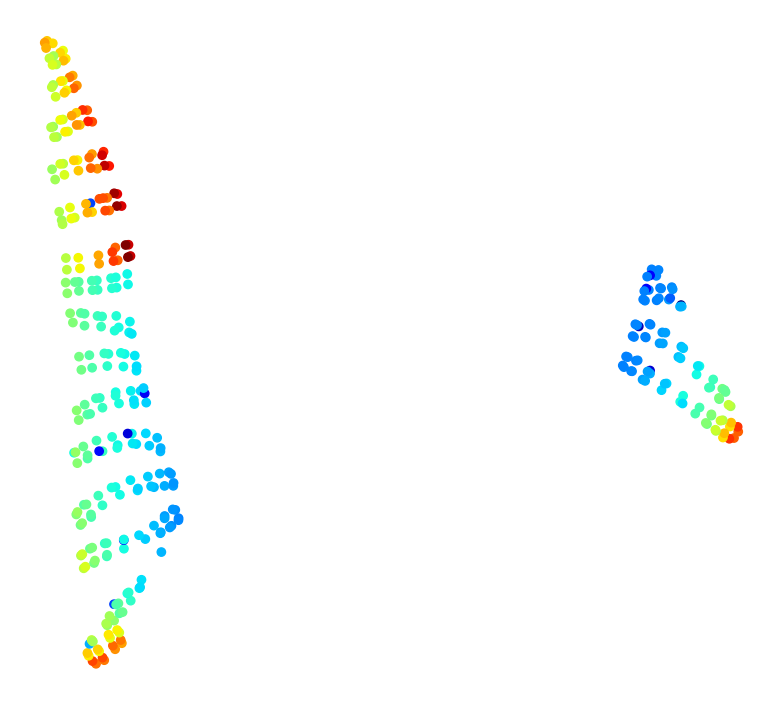

In [58]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets, preprocessing

# Next line to silence pyflakes. This import is needed.
Axes3D  

# Fixing random seed
np.random.seed(0)

fig = plt.figure(figsize=(8, 8))
update = False
t0 = time.time()
if update:  # rate is about of 10000 points/sec
  n_points = len(X)
  print(n_points)
  n_neighbors = 10
  n_components = 2
  tsne = manifold.TSNE(n_components=n_components, 
                       perplexity=30,
                       early_exaggeration=12.,
                       learning_rate=200.,
                       init='pca',
                       n_iter=1000,
                       verbose=1,
                       method='barnes_hut',
                       random_state=None)
  Y4S = tsne.fit_transform(X)
  t1 = time.time()
  np.save('/gdrive/My Drive/Colab Notebooks/Y4S_{}'.format(name), Y4S)
  Y4 = np.array([Y4S[map_tg[i]] for i, _ in enumerate(X)])
  np.save('/gdrive/My Drive/Colab Notebooks/Y4_{}'.format(name), Y4)
else:
  Y4 = np.load('/gdrive/My Drive/Colab Notebooks/Y4_{}.npy'.format(name))
  Y4S = np.load('/gdrive/My Drive/Colab Notebooks/Y4S_{}.npy'.format(name))
  t1 = time.time()
print("t-SNE: %.2g sec" % (t1 - t0))
print(Y4.shape)
# Colors
# print(color[-1])
# color = color / max(color)
# print(color[-1])
scolor = np.array([gs_max_abs[i] for i, _ in enumerate(X)])
# print(scolor[1])
# ax = fig.add_subplot(2, 5, 10)
ax = fig.add_subplot(1, 1, 1)
plt.scatter(Y4S[:, 0], Y4S[:, 1], c=scolor, cmap=plt.cm.jet)
# plt.scatter(Y4[:, 0], Y4[:, 1], c=color, cmap=plt.cm.viridis)
# start = 30000
# end = 35001
# plt.scatter(Y4[start:end, 0], Y4[start:end, 1], c=color[start:end], cmap=plt.cm.viridis)
# ax.set_facecolor('black')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
ax.set_aspect('equal')
plt.tight_layout()
plt.axis('off')
plt.show()

In [65]:
%matplotlib inline

from sklearn.cluster import DBSCAN
from itertools import cycle, islice
from ipywidgets import interact, interactive, interact_manual
import matplotlib.pyplot as plt
# Y4S = Y_tsne
YC = Y4S
labels = [0 for x in YC]
def clusterize(eps=3., min_samples=2):
  clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(YC)
  global labels 
  labels = clustering.labels_.astype(np.int)
  labels = [x + 1 for x in labels]
#   print(len(y_pred), len(Y_mds))
  print(len(set(labels)), set(labels))
#   colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
#                                        '#f781bf', '#a65628', '#984ea3',
#                                        '#999999', '#e41a1c', '#dede00']),
#                                         int(max(labels) + 1))))
#   add black color for outliers (if any)
#   colors = np.append(colors, ["#000000"])
  plt.figure(figsize=(5, 5))
#   plt.scatter(YC[:, 0], YC[:, 1], s=10, color=colors[labels])
  plt.scatter(YC[:, 0], YC[:, 1], s=10, c=labels, cmap=plt.cm.tab20)
  ax.set_aspect('equal')
  plt.tight_layout()
  plt.show()
  return labels

p = interactive(clusterize, eps=(.01, 10, .01), min_samples=(1, 100, 1))
p

interactive(children=(FloatSlider(value=3.0, description='eps', max=10.0, min=0.01, step=0.01), IntSlider(valu…

In [0]:
import pandas as pd
df = pd.DataFrame({
  'x': Y4S[:, 0], 'y': Y4S[:, 1], 
  'cnt': [len(x) for x in gs.values()],
  'cluster': labels,
  'p1': gs_ps[:, 0], 
  'p2': gs_ps[:, 1],
  'p3': gs_ps[:, 2],
  'mean_normal': gs_mean_normal,
  'max_shear': gs_max_shear,
  'I1': gs_ps[:, 0] + gs_ps[:, 1] + gs_ps[:, 2],
  'I2': gs_ps[:, 0]*gs_ps[:, 1] + gs_ps[:, 1]*gs_ps[:, 2] + gs_ps[:, 2]*gs_ps[:, 0],
  'I3': gs_ps[:, 0]*gs_ps[:, 1]*gs_ps[:, 2],
  'mc': mc,
  'max_abs_times': [','.join(map('{}'.format, x)) for x in gs_max_abs_times],
  'sum_abs_times': [','.join(map('{}'.format, x)) for x in gs_sum_abs_times],
  'max_abs': gs_max_abs, 'sum_abs': gs_sum_abs,
  '11': X[:, 0], '22': X[:, 1], '33': X[:, 2],
  '12': X[:, 3], '23': X[:, 4], '13': X[:, 5]})

In [149]:
import altair as alt
alt.data_transformers.enable(max_rows=None)
alt.renderers.set_embed_options(theme='Default')  # 'Default'

interval = alt.selection_interval(
  zoom=False,
  empty='all',
  on='[mousedown[event.button === 0], window:mouseup] > window:mousemove!'
#   clear='[mousedown[event.button === 2], window:mouseup] > window:mousemove!'
)
multi = alt.selection_multi(
    empty='all',
    fields=['x', 'y'],
    on='mouseover[event.shiftKey]',
    toggle='event.shiftKey'
)
scale = alt.selection_interval(
  bind='scales',
  resolve='global',
  translate='[mousedown[event.button === 1], window:mouseup] > window:mousemove!'
)
scale2 = alt.selection_interval(
  bind='scales',
  resolve='global',
  translate='[mousedown[event.button === 1], window:mouseup] > window:mousemove!'
)
size = 350
# input_checkbox = alt.binding_checkbox()
# checkbox_selection = alt.selection_single(bind=input_checkbox, name="color type")
columns = ['max_abs', 'sum_abs', 'p1', 'p2', 'p3', 
           '11', '22', '33', '12', '23', '13',
           'mean_normal', 'max_shear', 'mc', 'cnt', 'delta_mc']
columns_n = ['cluster', 'max_abs_times', 'sum_abs_times']
input_dropdown = alt.binding_select(options=columns, name='columns')
input_dropdown_n = alt.binding_select(options=columns_n, name='columns_n')
selection = alt.selection_single(fields=['column'], 
                                 bind=input_dropdown, 
                                 name='columns', 
                                 empty='all',
                                 clear=False,
                                 on="click[event.shiftKey&!event.shiftKey]",
                                 resolve='global',
                                 init={'column': 'max_abs'})
selection_n = alt.selection_single(fields=['column_n'], 
                                  bind=input_dropdown_n, 
                                  name='columns_n', 
                                  empty='all',
                                  clear=False,
                                  on="click[event.shiftKey&!event.shiftKey]",
                                  resolve='global',
                                  init={'column_n': 'cluster'})
# input_slider = alt.binding_range(min=-1e11, max=1e11, step=1e3)
# input_slider = alt.binding_range()
# slider_selection = alt.selection_single(bind=input_slider,
#                                         fields=['column'], 
#                                         name="slider")
min_slider = alt.binding_range(min=-300e6, max=300e6, step=1e6)
min_threshold = alt.selection_single(name="min_threshold", 
                                fields=['min_value'], 
                                bind=min_slider,
                                on='none',
                                init={'min_value': 0})
max_slider = alt.binding_range(min=-300e6, max=300e6, step=1e6)
max_threshold = alt.selection_single(name="max_threshold", 
                                fields=['max_value'], 
                                bind=max_slider,
                                on='none',
                                init={'max_value': 0})
tooltip =['index', 'cnt:Q', '11:N', '22:N', '33:N', '12:N', '23:N', '13:N', 
          'cluster:N', 'max_abs:Q', 'sum_abs:Q', 
          'p1:Q', 'p2:Q', 'p3:Q', 'mean_normal:Q', 
          'max_shear:Q', 'mc:Q', 'delta_mc:Q',
          'max_abs_times:N', 'sum_abs_times:N']
points = alt.Chart(width=size, height=size).transform_calculate(
  delta_mc='datum.max_shear*datum.max_abs - datum.mc'
).transform_fold(
  columns,
  as_=['column', 'value']
).mark_point(filled=True).encode(
  alt.X('x:Q', axis=alt.Axis(title='', grid=False)),
  alt.Y('y:Q', axis=alt.Axis(title='', grid=False)),
  color=alt.condition('max_threshold_max_value > datum.value & datum.value > min_threshold_min_value',
        alt.Color('value:Q', sort='descending',
                      scale=alt.Scale(nice=False,
                      scheme=alt.SchemeParams(name='redyellowgreen')),
                      legend=alt.Legend(orient="right")),
        alt.value('lightgrey')),
  size=alt.condition(multi | interval, alt.value(30), alt.value(10)),
  shape=alt.value('circle'),
  tooltip=tooltip
).add_selection(
    # checkbox_selection,
    selection,
    interval,
    scale,
    min_threshold,
    max_threshold,
    multi
).transform_filter(
  selection
)
points_n = alt.Chart(width=size, height=size).transform_fold(
  columns_n,
  as_=['column_n', 'value_n']
).mark_point(filled=True).encode(
  alt.X('x:Q', axis=alt.Axis(title='', grid=False)),
  alt.Y('y:Q', axis=alt.Axis(title='', grid=False)),
  color=alt.condition(multi | interval,
        alt.Color('value_n:N',
                  legend=alt.Legend(orient="right", labelLimit=30, columns=1)),
        alt.value('lightgrey')),
  size=alt.condition(multi | interval, alt.value(30), alt.value(10)),
  shape=alt.value('circle'),
  tooltip=tooltip
).add_selection(
  interval,
  scale,
  multi,
  selection_n
).transform_filter(
  selection_n
)
base_f = alt.Chart(height=size, width=size).transform_calculate(
  abs_mean_normal='datum.mean_normal*datum.max_abs',
  abs_max_shear='datum.max_shear*datum.max_abs',
  delta_mc='datum.abs_max_shear - datum.mc')
mc_f = base_f.mark_line().encode(
    x='abs_mean_normal:Q',
    y='mc:Q')
points_f = base_f.mark_point(filled=True).encode(
        alt.X('abs_mean_normal:Q', axis=alt.Axis(title='')),
        alt.Y('abs_max_shear:Q', axis=alt.Axis(title='')),
        color=alt.condition(multi | interval,
          alt.Color('delta_mc:Q', sort='descending',
                      scale=alt.Scale(nice=False,
                      scheme=alt.SchemeParams(name='redyellowgreen')),
                      legend=alt.Legend(orient="right")),
          alt.value('lightgrey')),
        size=alt.condition(multi | interval, alt.value(30), alt.value(10)),
        tooltip=tooltip).add_selection(interval, multi, scale2)
# Histograms
base = alt.Chart(height=180, width=240).transform_filter(
    multi).transform_filter(interval).transform_fold(
    ['11', '22', '33', '12', '23', '13'])
mean_bar = base.mark_bar(color='steelblue').encode(
    y=alt.Y('mean(value):Q', scale=alt.Scale(domain=[-1, 1]), 
            axis=alt.Axis(title='mean, median, range')),
    x=alt.X('key:N', axis=alt.Axis(title='component'), 
            sort=['11', '22', '33', '12', '23', '13']),
    tooltip=['mean(value):Q', 'min(value):Q', 'max(value):Q', 'median(value):Q']
)
range_rule = base.mark_rule(color='red', strokeWidth=2).encode(
    x=alt.X('key:N', 
            sort=['11', '22', '33', '12', '23', '13']),
    y=alt.Y('min(value):Q', scale=alt.Scale(domain=[-1, 1])),
    y2=alt.Y2('max(value):Q')
)
median_tick = base.mark_tick(color='green', thickness=2, size=30).encode(
    x=alt.X('key:N', 
            sort=['11', '22', '33', '12', '23', '13']),
    y=alt.Y('median(value):Q', scale=alt.Scale(domain=[-1, 1]))
)
base_2 = alt.Chart(height=180, width=320).transform_filter(
    multi).transform_filter(interval).transform_fold(
    ['p1', 'p2', 'p3', 'mean_normal', 'max_shear', 'I1', 'I2', 'I3'],
    as_=['key_2', 'value_2'])
mean_bar_2 = base_2.mark_bar(color='orange').encode(
    y=alt.Y('mean(value_2):Q', scale=alt.Scale(domain=[-2, 2]), 
            axis=alt.Axis(title='mean, median, range')),
    x=alt.X('key_2:N', axis=alt.Axis(title='component'), 
            sort=['p1', 'p2', 'p3', 'mean_normal', 'max_shear', 'I1', 'I2', 'I3']),
    tooltip=['mean(value_2):Q', 'min(value_2):Q', 'max(value_2):Q', 'median(value_2):Q']
)
range_rule_2 = base_2.mark_rule(color='red', strokeWidth=2).encode(
    x=alt.X('key_2:N', 
            sort=['p1', 'p2', 'p3', 'mean_normal', 'max_shear', 'I1', 'I2', 'I3']),
    y=alt.Y('min(value_2):Q', scale=alt.Scale(domain=[-2, 2])),
    y2=alt.Y2('max(value_2):Q')
)
median_tick_2 = base_2.mark_tick(color='green', thickness=2, size=30).encode(
    x=alt.X('key_2:N', 
            sort=['p1', 'p2', 'p3', 'mean_normal', 'max_shear', 'I1', 'I2', 'I3']),
    y=alt.Y('median(value_2):Q', scale=alt.Scale(domain=[-2, 2]))
)
# TODO
# median_tick_2 = base_2.mark_tick(color='green').encode(
#     x=alt.X('key_2:N', 
#             sort=['p1', 'p2', 'p3', 'mean_normal', 'max_shear', 'I1', 'I2', 'I3']),
#     y=alt.Y('value_2:Q', scale=alt.Scale(domain=[-2, 2])),
#     color='max_abs:Q'
# )
# Table
rows = [['sum_cnt', 'sum(cnt):Q'],
        ['max_max_abs', 'max(max_abs):Q'],
        ['max_sum_abs', 'max(sum_abs):Q']]
rs = list()
for r in rows:
  c1 = alt.Chart().mark_text().encode(text=alt.value(r[0]))
  c2 = alt.Chart().mark_text().encode(text=r[1]).transform_filter(
      multi).transform_filter(interval)
  rs.append(alt.hconcat(c1, c2, spacing=0))
table = alt.vconcat(*rs, spacing=0)

r1 = points_n | points | mc_f + points_f
r2 = mean_bar + median_tick + range_rule | mean_bar_2 + median_tick_2 + range_rule_2 | table
tensors = alt.vconcat(r1, r2, data=df.reset_index())
tensors.save(os.path.join(gdir, '{}.html').format(name))
tensors

VConcatChart({
  data:      index          x          y   cnt  cluster  ...    22    33    12    23    13
  0        0  38.802605  -4.074080  1360        1  ... -0.21 -0.10 -0.00  1.00 -0.00
  1        1  39.116238  -3.601869  1360        1  ... -0.26 -0.05 -0.00  1.00 -0.00
  2        2  38.461185  -4.128509  1360        1  ... -0.22 -0.11 -0.00  1.00 -0.00
  3        3  39.072620  -3.247610  1360        1  ... -0.27 -0.06 -0.00  1.00 -0.00
  4        4  37.988224  -4.035200  1360        1  ... -0.24 -0.13 -0.00  1.00 -0.00
  5        5  38.501278  -3.227215  1360        1  ... -0.29 -0.09  0.00  1.00 -0.00
  6        6  38.091282  -3.718365  1360        1  ... -0.25 -0.14  0.00  1.00 -0.00
  7        7  38.592278  -2.937865  1360        1  ... -0.30 -0.09  0.00  1.00 -0.00
  8        8  37.470825  -3.548094  1360        1  ... -0.28 -0.17 -0.00  1.00  0.00
  9        9  37.973186  -2.761607  1360        1  ... -0.33 -0.12  0.00  1.00  0.00
  10      10  37.429981  -3.464387  1360        1  ... -0.28 -0.17 -0.00  1.00 -0.00
  11      11  37.807812  -2.793763  1360        1  ... -0.33 -0.13  0.00  1.00 -0.00
  12      12  36.813274  -3.044126  1360        1  ... -0.32 -0.21  0.00  1.00  0.00
  13      13  37.135536  -2.421759  1360        1  ... -0.36 -0.16  0.00  1.00  0.00
  14      14  36.725834  -2.961001  1360        1  ... -0.32 -0.21 -0.00  1.00  0.00
  15      15  37.136040  -2.327759  1360        1  ... -0.37 -0.16  0.00  1.00  0.00
  16      16  35.947502  -2.274954  2720        1  ... -0.36 -0.25  0.00  1.00  0.00
  17      17  36.262375  -1.823279  2720        1  ... -0.41 -0.20 -0.00  1.00  0.00
  18      18  34.839806  -1.402351  2000        1  ... -0.40 -0.29  0.00  1.00  0.00
  19      19  35.054882  -0.956982  2720        1  ... -0.45 -0.25 -0.00  1.00  0.00
  20      20  35.013550  -1.527090   720        1  ... -0.40 -0.29  0.00  1.00  0.00
  21      21  33.462479  -0.546720  2720        2  ... -0.45 -0.34  0.00  1.00  0.00
  22      22  33.832664  -0.053915  1960        2  ... -0.50 -0.29  0.00  1.00  0.00
  23      23  32.065575   0.234740  1360        2  ... -0.50 -0.39  0.00  1.00  0.00
  24      24  32.616867   0.900827   240        2  ... -0.55 -0.34 -0.00  1.00  0.00
  25      25  32.253983   0.136986  1360        2  ... -0.50 -0.39  0.00  1.00  0.00
  26      26  32.612892   0.677186  1360        2  ... -0.54 -0.34  0.00  1.00  0.00
  27      27  31.223896   0.861118  1360        2  ... -0.55 -0.44 -0.00  1.00  0.00
  28      28  31.577337   1.627062  1360        2  ... -0.60 -0.40 -0.00  1.00  0.00
  29      29  31.290281   0.846832  1360        2  ... -0.55 -0.44  0.00  1.00  0.00
  ..     ...        ...        ...   ...      ...  ...   ...   ...   ...   ...   ...
  315    315  -9.772458   7.420379  1360       13  ...  0.56  0.44  0.00  0.00  0.04
  316    316  -8.093961   6.846506  1360       13  ...  0.62  0.38  0.00  0.00  0.07
  317    317  -8.150616   7.543598  1360       13  ...  0.62  0.38  0.00  0.00  0.04
  318    318  -8.470719   6.824044  1360       13  ...  0.61  0.39  0.00  0.00  0.07
  319    319  -8.521859   7.518353  1360       13  ...  0.61  0.39  0.00  0.00  0.04
  320    320  -6.692003   7.013124  1360       13  ...  0.67  0.33  0.00 -0.00  0.07
  321    321  -7.104259   7.707716  2080       13  ...  0.66  0.34  0.00 -0.00  0.04
  322    322  -7.038571   6.963635  1360       13  ...  0.66  0.34  0.00  0.00  0.07
  323    323  -5.855756   7.245876  2720       13  ...  0.71  0.29  0.00 -0.00  0.07
  324    324  -5.909886   8.015823  2720       13  ...  0.71  0.29  0.00 -0.00  0.04
  325    325  34.826023   5.609610  1320        4  ... -0.81 -0.04 -0.00  1.00 -0.00
  326    326  -5.425153  -1.287279  1260       10  ...  0.74  0.26  0.00  0.00  0.40
  327    327  -5.807911 -15.450647  1240        3  ...  0.67  0.11  0.00  0.00  1.00
  328    328  31.659195   4.245361  1180        1  ... -0.73 -0.27  0.00  0.88  0.00
  329    329  36.134109   1.236063  1160        1  ... -0.62 -0.10  0

MovieWriter imagemagick unavailable. Trying to use pillow instead.


16000 5 0 1 0 16000 0 16000 0.0
16000 5 0 1 0 16000 0 16000 0.0
16000 5 0 1 0 16000 0 16000 0.2
16000 5 0 1 0 16000 0 16000 0.4
16000 5 0 1 0 16000 0 16000 0.6
16000 5 0 1 0 16000 0 16000 0.8
16000 5 1 2 16000 32000 16000 32000 0.0
16000 5 1 2 16000 32000 16000 32000 0.19999999999999996
16000 5 1 2 16000 32000 16000 32000 0.3999999999999999
16000 5 1 2 16000 32000 16000 32000 0.6000000000000001
16000 5 1 2 16000 32000 16000 32000 0.8
16000 5 2 3 32000 48000 32000 48000 0.0
16000 5 2 3 32000 48000 32000 48000 0.20000000000000018
16000 5 2 3 32000 48000 32000 48000 0.3999999999999999
16000 5 2 3 32000 48000 32000 48000 0.6000000000000001
16000 5 2 3 32000 48000 32000 48000 0.7999999999999998
16000 5 3 4 48000 64000 48000 64000 0.0
16000 5 3 4 48000 64000 48000 64000 0.20000000000000018
16000 5 3 4 48000 64000 48000 64000 0.3999999999999999
16000 5 3 4 48000 64000 48000 64000 0.6000000000000001
16000 5 3 4 48000 64000 48000 64000 0.7999999999999998
16000 5 4 5 64000 80000 64000 80000 0.0


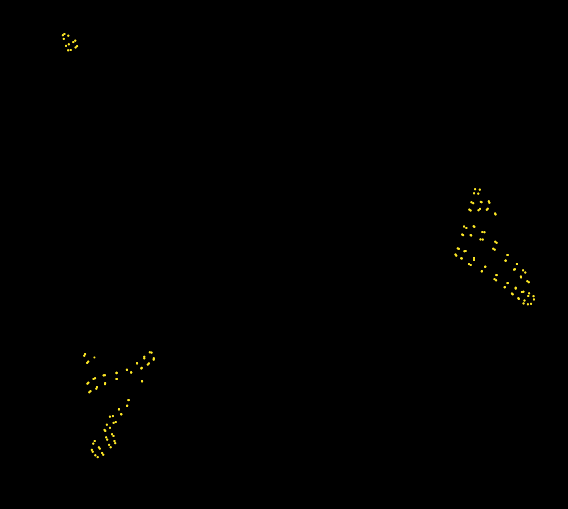

In [59]:
 import matplotlib.pyplot as plt
from matplotlib import animation, style, cm
style.use('dark_background')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
cmap = cm.get_cmap('viridis')
colors = cmap(color)
def draw_3d_update(frame, m, n):
  d = 3
  i = int(frame / m)
  k = frame / m - i
  prev_start = i * n
  prev_end = i * n + n
  start = (i + 1) * n
  end = (i + 1) * n + n
  if end > len(Y4):
    start = prev_start
    end = prev_end
  print(n, m, i, i + 1, prev_start, prev_end, start, end, k)
  cs = colors[start:end]
  ps = Y4[start:end]
  prev_ps = Y4[prev_start:prev_end]
  prev_cs = colors[prev_start:prev_end]
  delta_ps = ps - prev_ps
  delta_cs = cs - prev_cs
  cur_ps = prev_ps + k * delta_ps
  cur_cs = prev_cs + k * delta_cs
  ax.cla()
  ax.scatter(cur_ps[:, 0], cur_ps[:, 1], s=1**2, c=cur_cs)
  ax.set_xlim(min(Y4[:, 0]) - d, max(Y4[:, 0]) + d)
  ax.set_ylim(min(Y4[:, 1]) - d, max(Y4[:, 1]) + d)
#   ax.set_xlim(-6.5, -2)
#   ax.set_ylim(1, 5.5)
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
  ax.set_aspect('equal')
  plt.axis('off')
  plt.tight_layout()
steps = 35
m = 5
n = 16000
ani = animation.FuncAnimation(fig, draw_3d_update, (steps - 1)*m + 1, 
                              fargs=[m, n], interval=200, blit=False)
ani.save('/gdrive/My Drive/Colab Notebooks/test2.gif', writer='imagemagick')

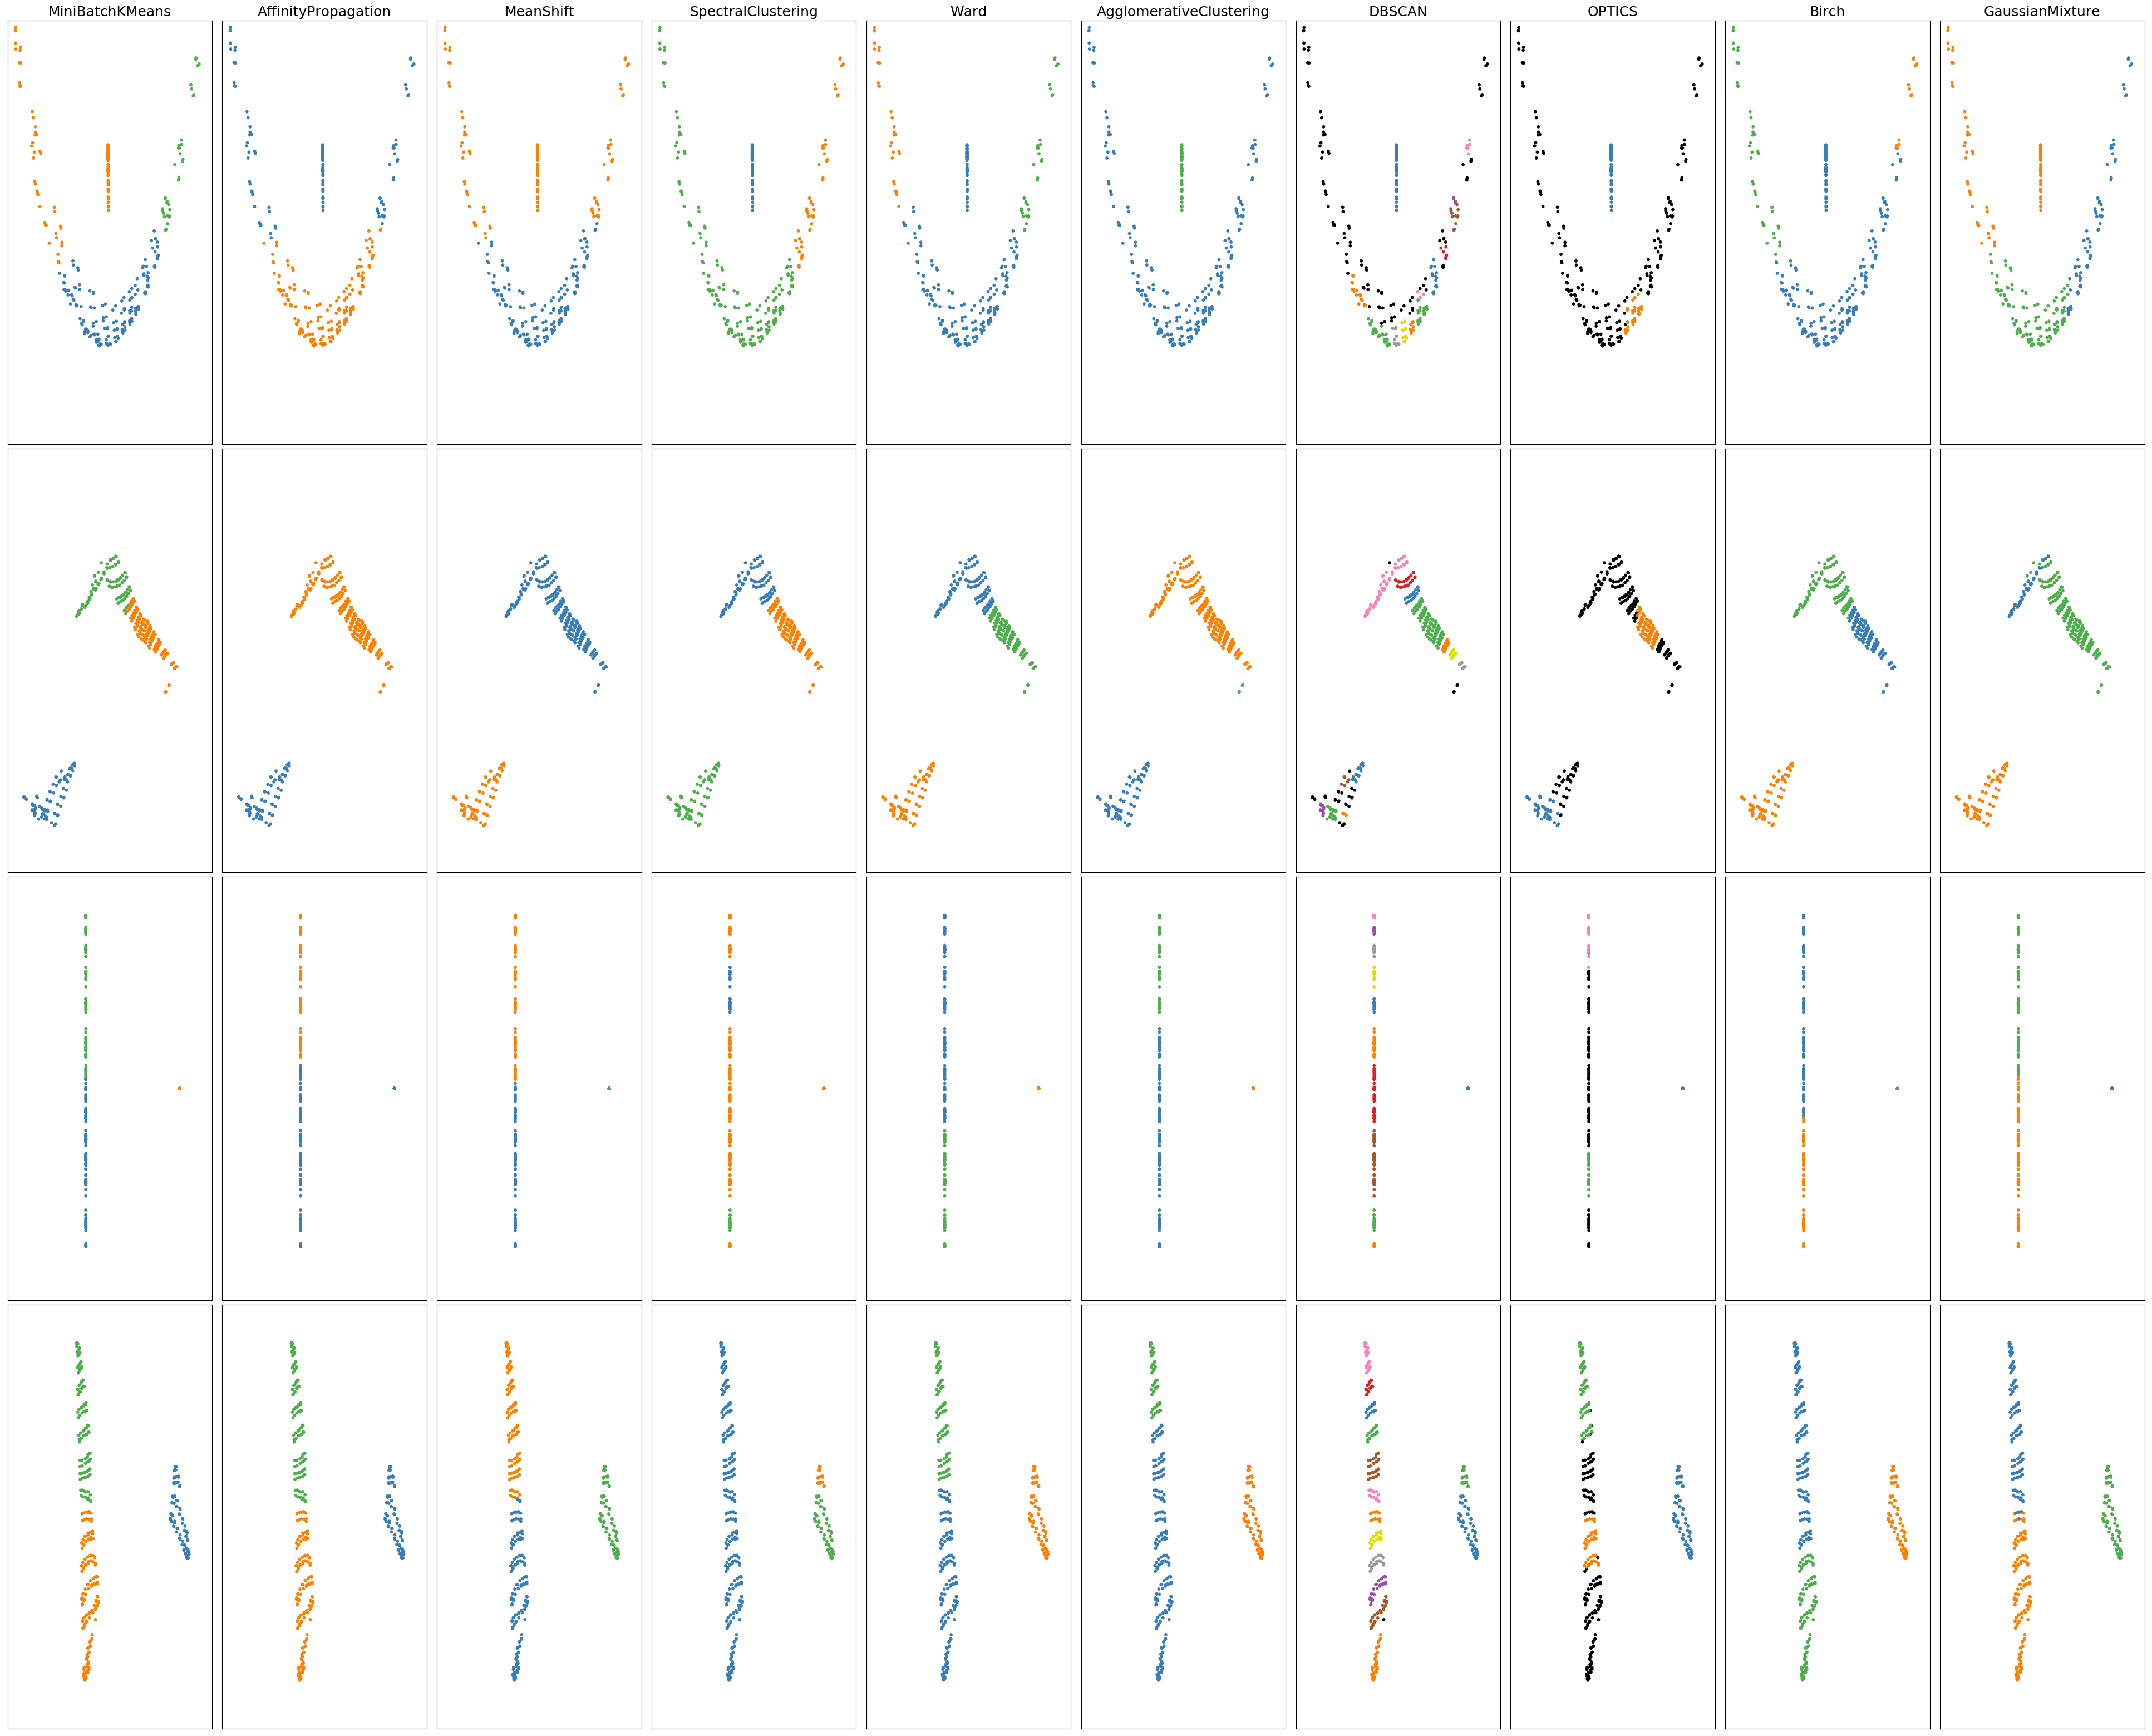

In [39]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

style.use('default')

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(10*4, 8*4))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .1,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

# datasets = [
#     (noisy_circles, {'damping': .77, 'preference': -240,
#                      'quantile': .2, 'n_clusters': 2,
#                      'min_samples': 20, 'xi': 0.25}),
#     (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
#     (varied, {'eps': .18, 'n_neighbors': 2,
#               'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
#     (aniso, {'eps': .15, 'n_neighbors': 2,
#              'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
#     (blobs, {}),
#     (no_structure, {})]
datasets = [
#     ((YS[0], None), {}),
#     ((YS[1], None), {}),
#     ((YS[2], None), {}),
#     ((YS[3], None), {}),
    ((Y_iso, None), {}),
    ((Y_mds, None), {}),
    ((Y_se, None), {}),
    ((Y_tsne, None), {})
]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'],
                            xi=params['xi'],
                            min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
#         plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
#                  transform=plt.gca().transAxes, size=15,
#                  horizontalalignment='right')
        plot_num += 1

plt.show()